# Similarity Search

Cosine similarity is a technique from information retrieval. It can be used to find documents that are similar to each other, for example, by giving the user the option to "show me more documents like this."

## Cosine Similarity

We start with a vector representation of our text data. This can be obtained using tokenization or embeddings, as discussed elsewhere in these notes. 

+ If the vectors are identical, then the angle is 0 degrees and the cosine similarity is 1.
+ If the vectors are unrelated, the angle is 90 degrees and the cosine similarity is 0.
+ If the vectors are opposite directions, the angle is 180 degress and the cosine similarity is -1.

The cosine is a trigonometric function that, when applied to any vector, results in a metric that depends on the differences of direction in the vector and not on their magnitude. This is important because it allows us to compare documents of different lengths. 

![](img/02_cosine_similarity.png)

Image source: Cosine Similarity Explained ([Shivanandhan, 2025](https://medium.com/data-science-collective/cosine-similarity-explained-the-math-behind-llms-b20caac9f93c))

Given a corpus of documents, we can obtain their tf-idf similarity as before.

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

documents = [
    "Freedom consists not in doing what we like, but in having the right to do what we ought.",
    "Those who deny freedom to others deserve it not for themselves.",
    "Liberty, when it begins to take root, is a plant of rapid growth.",
    "Freedom lies in being bold.",
    "Is freedom anything else than the right to live as we wish?",
    "I am no bird and no net ensnares me: I am a free human being with an independent will.",
    "The secret to happiness is freedom... And the secret to freedom is courage."
    "Freedom is the oxygen of the soul.", 
    "Life without liberty is like a body without spirit."
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)
cosine_similarities = cosine_similarity(X)

We plot the results to illustrate a similarity search.

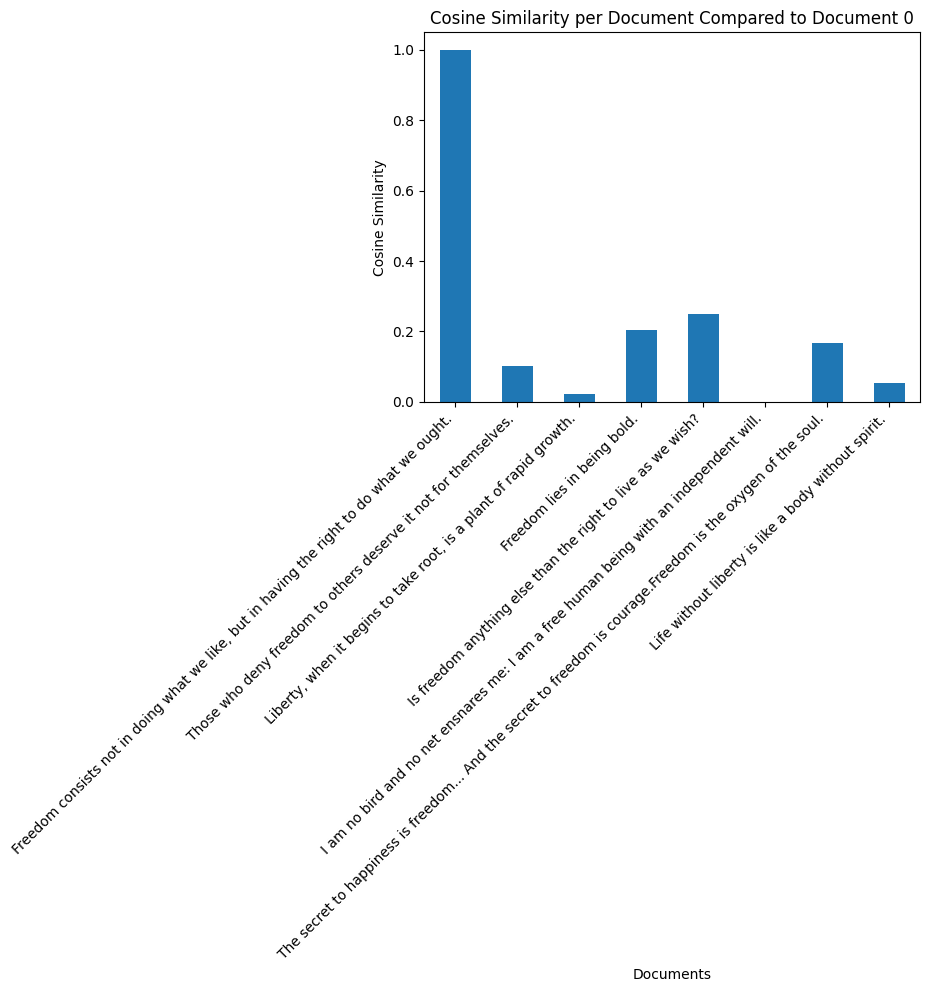

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

similarities_df = pd.DataFrame(cosine_similarities)
row = similarities_df.loc[0,:]

row.plot(kind='bar', 
         xlabel='Documents',
         ylabel='Cosine Similarity', 
         title='Cosine Similarity per Document Compared to Document 0')

plt.xticks(range(len(documents)), documents, rotation=45, ha='right')
plt.show()

Perform a similarity search:

In [3]:
def most_similar(similarity_matrix, index):
    similarities = similarity_matrix[index].copy()
    similarities[index] = -1  # Exclude self
    return similarities.argmax()

In [4]:
most_similar(cosine_similarities, 0)

np.int64(4)

We have found texts that *look* similar. However, we may want to find texts that have *similar meaning*.